# Final Project Submission

Please fill out:
* Student name: Kevin Riungu
* Student pace: Hybrid
* Scheduled project review date/time: 
* Instructor name: Mark Tiba
* Blog post URL:


### MOVIE INDUSTRY ANALYSIS


#### AUTHOR: KEVIN RIUNGU




#### INTRODUCTION
The task at hand is to assist Microsoft to make inroads into the Movie industry. The major goal was to explore What type of films are currently doing the best in the market and to provide these findings to Microsoft's new movie studio executives. My analysis approach targeted utilization of descriptive statistics and visualizations from provided data sets.



#### BUSINESS UNDERSTANDING:
Microsoft wants to venture into the profitable movie making industry but they seek credible market research in order to have clear insights before they jump into the market.
To assist them in this endavour i have been looking at data provided by various sources in order to unearth movies that perform well in the market currently. By analyzing the movies that have been most successful recently i can make tangible recommendations about which movies the company should target in order to realize optimum revenues.
After carefully considering the business problem and combing through the data provided, I have come up with the following questions that will guide the course of my analysis: 

##### 1   What type of movies are currently most successful.
 
##### 2   Is there better time of year to release a movie
 
##### 3   The budget: How much the company should sink in in terms of dollars ($) in order to achieve optimum revenues






 

### DATA UNDERSTANDING
Data used in this project was cited from various sources; namely:-
##### Box office Mojo
Box Office Mojo is a popular website that tracks box office revenue for movies.
##### IMDB
IMDb, or the Internet Movie Database, is an online database of information related to films, television programs, home videos, video games, and streaming content. 
##### Rotten Tomatoes
Rotten Tomatoes is a website that aggregates reviews and provides a numerical score based on the percentage of critics who have given a favorable review for movies, TV shows, and sometimes other forms of media
##### The Movie DB
The Movie Database (TMDb) is an online database that provides information about movies, TV shows, and celebrities. 
##### The Numbers
The Numbers is a website that focuses on providing detailed financial information and box office data for movies. It offers comprehensive information on box office earnings, budgets, production costs, and revenue generated by films worldwide.

### LOADING NECESSARY LIBRARIES

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import os
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING AND PREVIEWING THE DATASETS

In [2]:
# reading and previewing the data files
bom_movie_gross_df = pd.read_csv(r"C:\\Users\\HP\\Desktop\\PHASE_1_PROJECT\\dsc-phase-1-project-v2-4\\zippedData\\bom.movie_gross.csv.gz")
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
tmdb_movies_df = pd.read_csv(r"C:\Users\HP\Desktop\PHASE_1_PROJECT\dsc-phase-1-project-v2-4\tmdb.movies.csv.gz")
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
tn_movie_budget_df = pd.read_csv(r"C:\Users\HP\Desktop\PHASE_1_PROJECT\dsc-phase-1-project-v2-4\tn.movie_budgets.csv.gz")
tn_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### Reading from the database file 'im.db'

In [5]:
# Construct the full file path including the database file name
db_file_path = r"C:\Users\HP\Desktop\unzipped\im.db"

# Connect to the SQLite database
conn = sqlite3.connect(db_file_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()


In [6]:
table_name_query = """
SELECT name
AS 'Table Names'
FROM sqlite_master
WHERE type= 'table';
"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [7]:
movie_rating_query = ("""SELECT *
                        FROM movie_ratings;

""")
movie_rating_data=pd.read_sql(movie_rating_query, conn)
movie_rating_data.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
directors_query = ("""SELECT *
                        FROM directors;

""")
directors_data=pd.read_sql(directors_query, conn)

In [9]:
import pandas as pd

# Assuming you have established a database connection named 'conn'

# Fetching data from the 'person' table
person_query = ("""SELECT person_id, primary_name
                   FROM persons;""")
person_data = pd.read_sql(person_query, conn)

# Assuming 'directors_data' is already fetched using your earlier code

# Merging 'person_data' with 'directors_data' using 'person_id'
director_data_merged = pd.merge(directors_data, person_data, on='person_id', how='inner')

# The merged data is stored in 'director_data_merged'
director_data_merged

,movie_id,person_id,primary_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0835418,nm0151540,Jay Chandrasekhar
4,tt0859635,nm0151540,Jay Chandrasekhar
...,...,...,...
291166,tt8999892,nm10122247,C. Damon Adcock
291167,tt8999974,nm10122357,Daysi Burbano
291168,tt9001390,nm6711477,Bernard Lessa
291169,tt9001494,nm10123242,Tate Nova


In [10]:
movie_basics_query = """
    SELECT *
    FROM movie_basics
"""

# Execute the query and read the results into a DataFrame
movie_basics_data = pd.read_sql(movie_basics_query, conn)

# Displaying the fetched data
movie_basics_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [11]:
#reading the rotten tomatoes files
rt_movie_info_df = pd.read_csv(r"C:\Users\HP\Desktop\PHASE_1_PROJECT\dsc-phase-1-project-v2-4\rt.movie_info.tsv.gz", sep ='\t')
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
rt_reviews_df = pd.read_csv(r"C:\Users\HP\Desktop\PHASE_1_PROJECT\dsc-phase-1-project-v2-4\rt.reviews.tsv.gz", sep ='\t', encoding = 'unicode_escape')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### CLEANING THE DATASETS

##### Now that we have our datasets loaded, we set out to explore and clean them ready for our analysis. This will involve checking for duplicates, Missing values indicated by 'NaN' and check for datatype compatibilities


In [13]:
#Exploring the dataset 
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


We notice the dataset has five columns and  has missing values on 'studio', domestic_gross and foreign_gross columns

In [14]:
bom_movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
print(bom_movie_gross_df['foreign_gross'].dtype)

object


Since the number of missing values on 'Studio' and domestic gross are relatively few, we opt to drop their corresponding rows.
However the foreign_gross column has high number of missing values and dropping them will lead to massive loss of data. Therefore we chose to fill the missing values with the average value for foreign_gross.
However, we notice the 'foreign_gross' column has datatype 'object'. Before calculating the mean for foreign gross we convert the data type to float 

In [16]:

# Convert 'foreign_gross' column to numeric (float)
bom_movie_gross_df['foreign_gross'] = pd.to_numeric(bom_movie_gross_df['foreign_gross'], errors='coerce')

# Calculate the mean excluding NaN values
mean_foreign_gross = bom_movie_gross_df['foreign_gross'].mean(skipna=True)

# Fill missing values in 'foreign_gross' column with the calculated mean
bom_movie_gross_df['foreign_gross'].fillna(mean_foreign_gross, inplace=True)


In [17]:
# Drop rows with null values in 'studio' and 'domestic_gross' columns
bom_movie_gross_df.dropna(subset=['studio', 'domestic_gross'], inplace=True)
movie_gross_cleaned_df = bom_movie_gross_df
movie_gross_cleaned_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [18]:
movie_gross_cleaned_df['year'] = pd.to_datetime(bom_movie_gross_df['year'], format='%Y')


In [19]:
movie_gross_cleaned_df.info()
movie_gross_cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   foreign_gross   3356 non-null   float64       
 4   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 157.3+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010-01-01
3,Inception,WB,292600000.0,535700000.0,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010-01-01


Now our dataset 'bom_movie_gross_df' is clean and free from non null values. We have also fixed the 'year' column data type to collect date format. We do the same for the other datasets.

In [20]:
# We now set to investigate the 'tmdb_movies_df' dataset
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [21]:
# Convert 'release_date' column to datetime format
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])

# Print the DataFrame info to verify the changes
print(tmdb_movies_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB
None


We find that all the columns in this dataset are free from NaN values. However we have one column that is unnamed and we notice that it is a duplicate index column. so we drop it from the data set

In [22]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
#Investigating the 'tn_movie_budget_df' dataset
tn_movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This data set has no Null values but we need to convert the columns 'release date' to "date" type and 'production budget', 'domestic_gross', 'worldwide_gross' all to float data type inorder to be able to perform calculations on them

In [24]:
tn_movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:

# Convert 'release_date' column to datetime format
tn_movie_budget_df['release_date'] = pd.to_datetime(tn_movie_budget_df['release_date'])



In [26]:
# Remove dollar signs ($) and commas (,) from monetary columns and convert to float
monetary_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in monetary_columns:
    tn_movie_budget_df[col] = tn_movie_budget_df[col].replace('[\$,]', '', regex=True).astype(float)

# Print the DataFrame info to verify the changes
print(tn_movie_budget_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB
None


In [27]:
movie_budget_cleaned = tn_movie_budget_df
movie_budget_cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [28]:
#Cleaning the 'rt_movie_info_df' Dataframe
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [29]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [30]:
tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [31]:
# cleaning the dataframe

# Convert date columns to datetime
date_columns = ['theater_date', 'dvd_date']
for col in date_columns:
    rt_movie_info_df[col] = pd.to_datetime(rt_movie_info_df[col], errors='coerce')

# Convert currency and box_office columns to numeric
monetary_columns = ['currency', 'box_office']
for col in monetary_columns:
    rt_movie_info_df[col] = pd.to_numeric(rt_movie_info_df[col].replace('[\$,]', '', regex=True), errors='coerce')

# Drop columns with a high percentage of missing values or irrelevant to analysis
#columns_to_drop = ['runtime', 'studio']
#rt_movie_info_df.drop(columns=columns_to_drop, inplace=True)

# Cleaning text data (removing unnecessary characters, handling NaNs)
rt_movie_info_df['synopsis'].fillna('', inplace=True)
rt_movie_info_df['synopsis'] = rt_movie_info_df['synopsis'].str.replace('\n', ' ').str.strip()

# Print DataFrame info after cleaning
print(rt_movie_info_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1560 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   currency      0 non-null      float64       
 9   box_office    340 non-null    float64       
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 146.4+ KB
None


In [32]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,NaN,600000.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128 minutes,NaN
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,NaN,200 minutes,NaN


In [33]:
rt_movie_info_df.isna().sum()

id                 0
synopsis           0
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1560
box_office      1220
runtime           30
studio          1066
dtype: int64

In [34]:
# Drop rows with missing values in a specific column ('theater_date' for example)
rt_movie_info_df = rt_movie_info_df.dropna(subset=['theater_date'])

# Impute missing values in numerical columns ('currency' and 'box_office') with mean
numerical_columns = ['currency', 'box_office']
for col in numerical_columns:
    rt_movie_info_df[col].fillna(rt_movie_info_df[col].mean(), inplace=True)

# Print DataFrame info after cleaning
print(rt_movie_info_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1201 non-null   int64         
 1   synopsis      1201 non-null   object        
 2   rating        1201 non-null   object        
 3   genre         1201 non-null   object        
 4   director      1083 non-null   object        
 5   writer        938 non-null    object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   currency      0 non-null      float64       
 9   box_office    1201 non-null   float64       
 10  runtime       1194 non-null   object        
 11  studio        464 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 122.0+ KB
None


In [35]:
movie_info_cleaned = rt_movie_info_df

In [36]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### Acquiring and merging the required datasets

In [37]:
# Merge the DataFrames on the 'movie_id' column
merged_data = pd.merge(movie_basics_data, movie_rating_data, on='movie_id', how='inner')

# Displaying the merged DataFrame
merged_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [38]:
# Drop rows with missing genre values
merged_data.dropna(subset=['genres'], inplace=True)

# Drop rows with missing runtime values
merged_data.dropna(subset=['runtime_minutes'], inplace=True)


In [39]:
merged_data.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [40]:
# Merge based on 'primary_title' in merged_data and 'title' in tmdb_movies_df
merged_df = merged_data.merge(tmdb_movies_df, how='inner', left_on='primary_title', right_on='title')

# Display the merged DataFrame
merged_df


,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,Heaven & Hell,7.5,2
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,Foodfight!,2.1,46
3,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,9600,"[35, 18]",323498,en,Return to Babylon,0.877,2013-08-11,Return to Babylon,7.0,1
4,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,1243,[35],112074,en,Life's a Beach,1.206,2010-01-01,Life's a Beach,3.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19296,tt9584192,A Haunting on Finn Road: The Devil's Grove,A Haunting on Finn Road: The Devil's Grove,2018,129.0,Documentary,5.6,64,26120,"[99, 27]",573004,en,A Haunting on Finn Road: The Devil's Grove,0.697,2018-10-26,A Haunting on Finn Road: The Devil's Grove,10.0,1
19297,tt9595506,So Pretty,So Pretty,2019,83.0,Drama,5.3,15,7453,[],201725,en,So Pretty,0.600,2012-08-29,So Pretty,6.0,1
19298,tt9598566,Ave Maria,Ave Maria,2018,74.0,Drama,7.3,30,16520,[53],444182,en,Ave Maria,0.600,2015-08-19,Ave Maria,10.0,1
19299,tt9647790,Celia,Celia,2018,100.0,Documentary,8.2,8,6338,[18],334204,en,Celia,1.400,2012-10-26,Celia,5.7,3


In [41]:
merged_df.isna().sum()

movie_id             0
primary_title        0
original_title_x     0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title_y     0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [42]:
# Drop rows with missing genre values
merged_df.dropna(subset=['genres'], inplace=True)

# Drop rows with missing runtime values
merged_df.dropna(subset=['runtime_minutes'], inplace=True)
merged_df.head()


,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,Heaven & Hell,7.5,2
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,Foodfight!,2.1,46
3,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,9600,"[35, 18]",323498,en,Return to Babylon,0.877,2013-08-11,Return to Babylon,7.0,1
4,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,1243,[35],112074,en,Life's a Beach,1.206,2010-01-01,Life's a Beach,3.2,3


## DATA ANALYSIS

## What type of movies are currently most successful?


In tackling the analysis we merged movies_basics and movie_rating tables to achieve final table merged_data


In [43]:
# Merge the DataFrames on the 'movie_id' column
merged_data = pd.merge(movie_basics_data, movie_rating_data, on='movie_id', how='inner')

# Displaying the merged DataFrame
merged_data


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [44]:
directors_data

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [45]:
# Merge the DataFrames on the 'movie_id' column
merged_data2 = pd.merge(merged_data, director_data_merged, on='movie_id', how='inner')
# Renaming the 'primary_name' column to 'director'
director_data_merged.rename(columns={'primary_name': 'director'}, inplace=True)

# Displaying the merged DataFrame
merged_data2


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul
...,...,...,...,...,...,...,...,...,...,...
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou


## Top five genres 

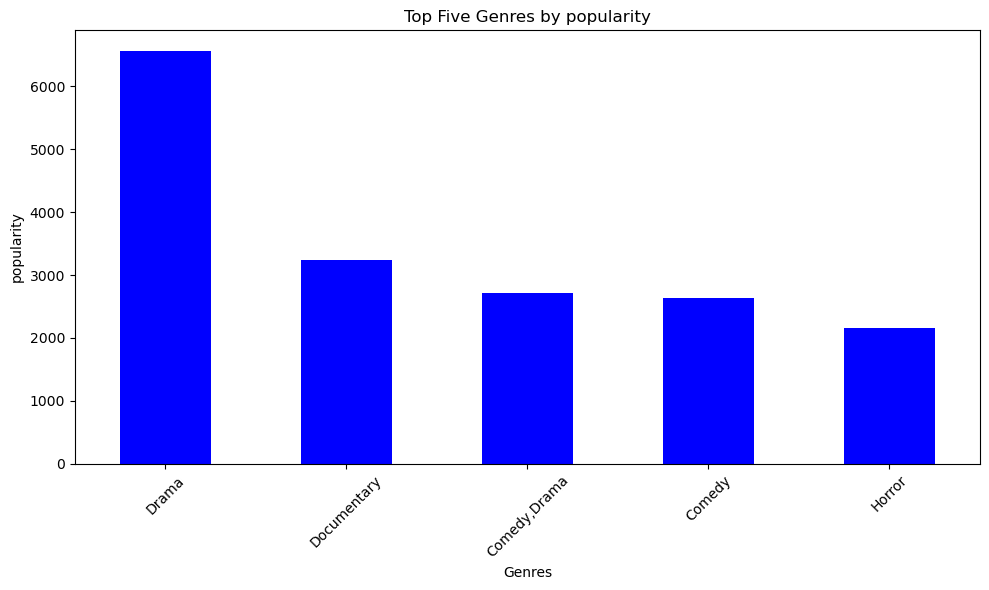

In [46]:
import matplotlib.pyplot as plt

# Assuming merged_df contains the necessary columns for genres and numvotes

# Group by genre and sum the numvotes for each genre
genre_votes = merged_df.groupby('genres')['popularity'].sum().sort_values(ascending=False)

# Select top five genres
top_five_genres = genre_votes.head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_five_genres.plot(kind='bar', color='blue')
plt.title('Top Five Genres by popularity')
plt.xlabel('Genres')
plt.ylabel('popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


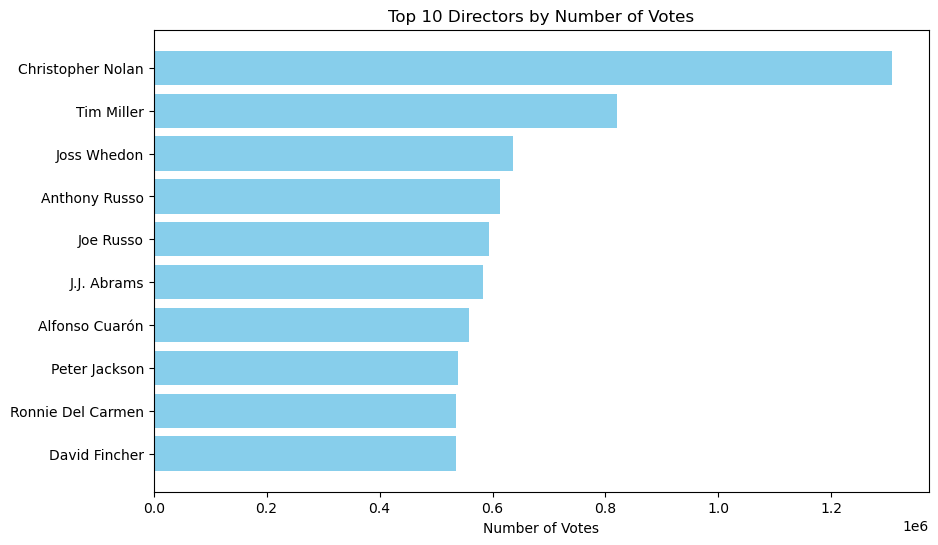

In [47]:


# Grouping the data by director and calculating their average ratings
director_avg_ratings = merged_data2.groupby('primary_name')['numvotes'].mean().reset_index()

# Selecting the top 10 directors based on average rating
top_10_directors = director_avg_ratings.nlargest(10, 'numvotes')

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_directors['primary_name'], top_10_directors['numvotes'], color='skyblue')
plt.xlabel('Number of Votes')
plt.title('Top 10 Directors by Number of Votes')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.show()


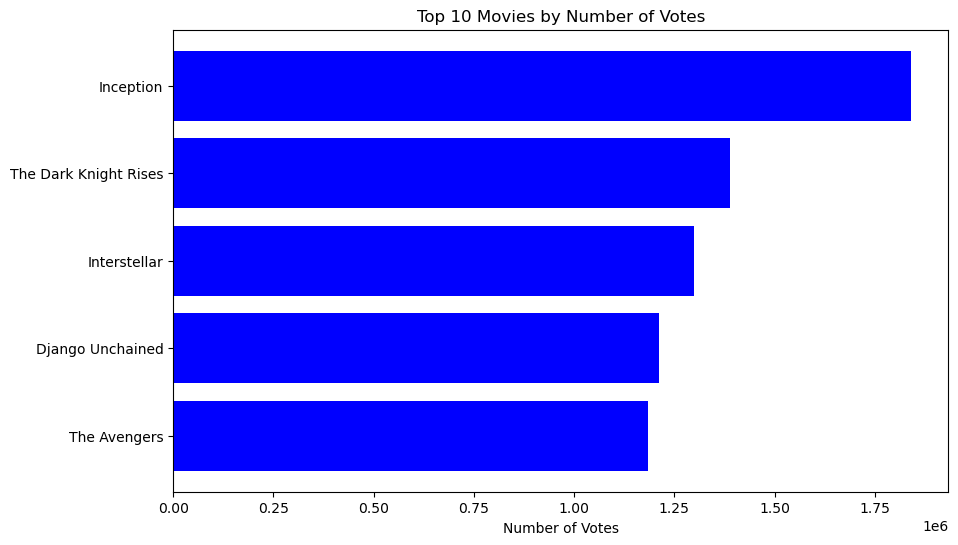

In [48]:
# Sorting the data by 'numvotes' to get the top 10 movies
top_10_movies_by_votes = merged_data2.nlargest(10, 'numvotes')

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies_by_votes['primary_title'], top_10_movies_by_votes['numvotes'], color='blue')
plt.xlabel('Number of Votes')
plt.title('Top 10 Movies by Number of Votes')

# Inverting y-axis to display the highest number of votes at the top
plt.gca().invert_yaxis()

plt.show()


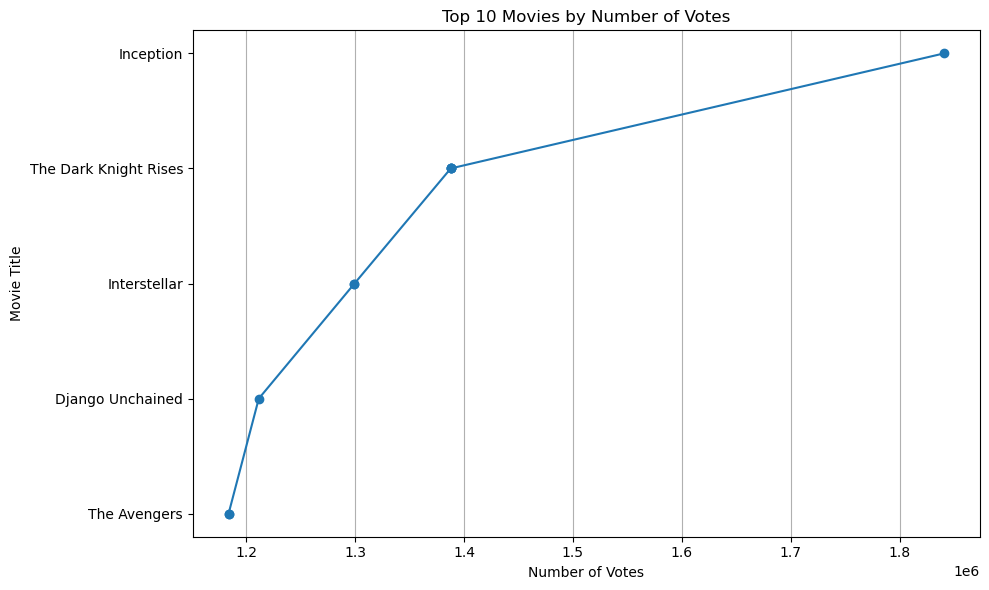

In [49]:
# Sorting the data by 'numvotes' to get the top 10 movies
top_10_movies_by_votes = merged_data2.nlargest(10, 'numvotes')

# Creating a horizontal line plot with markers
plt.figure(figsize=(10, 6))
plt.plot(top_10_movies_by_votes['numvotes'], top_10_movies_by_votes['primary_title'], marker='o', linestyle='-')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Number of Votes')
plt.gca().invert_yaxis()  # Invert y-axis to display top movies at the top
plt.grid(True, axis='x')  # Add gridlines on the x-axis for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [50]:
movie_budget_cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [51]:
# Merging the DataFrames on 'movie' and 'primary_title' columns
merged_data_with_budget = pd.merge(merged_data2, movie_budget_cleaned, left_on='primary_title', right_on='movie', how='inner')


In [52]:
merged_data_with_budget.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,nm0440415,Lawrence Kasanoff,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,nm0440415,Lawrence Kasanoff,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,nm0440415,Lawrence Kasanoff,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,nm0440415,Lawrence Kasanoff,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,nm0440415,Lawrence Kasanoff,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0


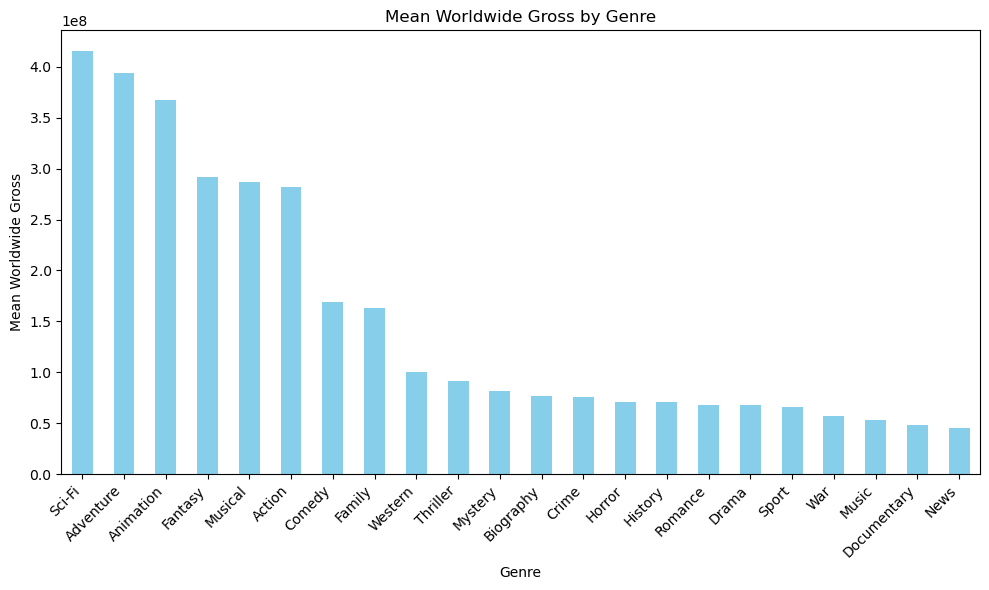

In [53]:

# Splitting the genres into individual categories
merged_data_with_budget['genres'] = merged_data_with_budget['genres'].str.split(',')

# Exploding the DataFrame based on genres
data_exploded = merged_data_with_budget.explode('genres')

# Grouping by genres and calculating the mean worldwide gross
mean_gross_by_genre = data_exploded.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_gross_by_genre.plot(kind='bar', color='skyblue')
plt.title('Mean Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Worldwide Gross')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


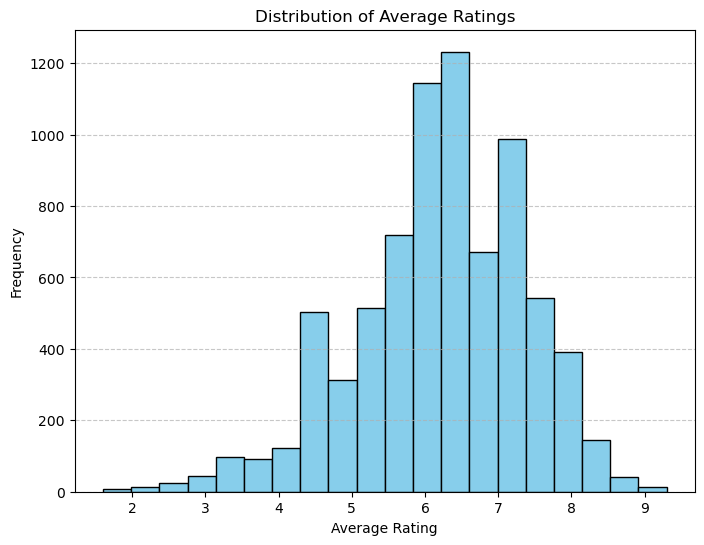

In [55]:
# Plotting histogram for averagerating
plt.figure(figsize=(8, 6))
plt.hist(merged_data_with_budget['averagerating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


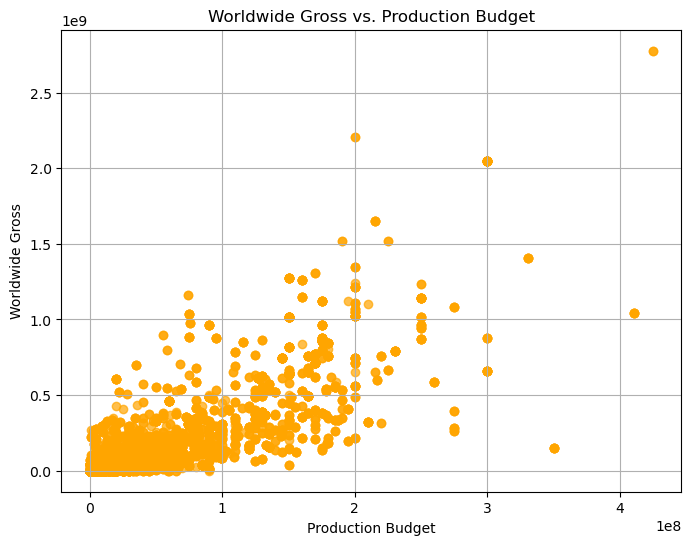

In [57]:
# Scatter plot for worldwide gross vs. production budget
plt.figure(figsize=(8, 6))
plt.scatter(merged_data_with_budget['production_budget'], merged_data_with_budget['worldwide_gross'], color='orange', alpha=0.7)
plt.title('Worldwide Gross vs. Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid()
plt.show()


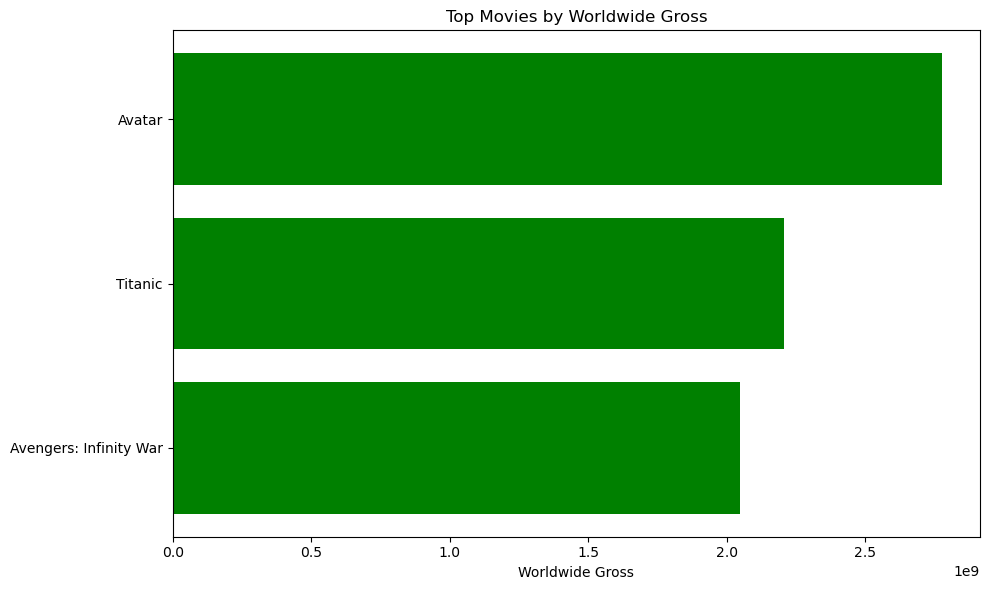

In [58]:
# Sorting by worldwide gross to get top movies
top_movies = merged_data_with_budget.sort_values(by='worldwide_gross', ascending=False).head(10)

# Bar plot for top movies by worldwide gross
plt.figure(figsize=(10, 6))
plt.barh(top_movies['movie'], top_movies['worldwide_gross'], color='green')
plt.xlabel('Worldwide Gross')
plt.title('Top Movies by Worldwide Gross')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
